# Laboratorio 3 - Parte 2

### Arboles de decisión y Random Forest

### 2019-I

#### Profesor: Julián D. Arias Londoño
#### julian.ariasl@udea.edu.co


## Guía del laboratorio

En esta archivo va a encontrar tanto celdas de código cómo celdas de texto con las instrucciones para desarrollar el laboratorio.

Lea atentamente las instrucciones entregadas en las celdas de texto correspondientes y proceda con la solución de las preguntas planteadas.

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

#### Primer integrante: Kevin Martínez Gallego
#### Segundo integrante: Andrés Mauricio Álvarez Ortiz

In [1]:
from __future__ import division

%matplotlib inline
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import numpy.matlib as matlib
from scipy import stats

#Algunas advertencias que queremos evitar
import warnings
warnings.filterwarnings("always")


## Ejercicio 1

A continuación se leen los datos de un problema de clasificación. El problema corresponde a la clasificación de dígitos escritos a mano, el cual fue abordado en el laboratorio anterior. Usaremos únicamente 4 de las 10 clases disponibles. Los datos fueron preprocesados para reducir el número de características. La técnica usada será analizada más adelante en el curso.

In [3]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
digits = load_digits(n_class=4)

#--------- preprocesamiento--------------------
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)

#---------- Datos a usar ----------------------
X = data
Y = digits.target

In [4]:
print(X.shape)
print(Y.shape)
print(np.unique(Y, return_counts = True))

(720, 39)
(720,)
(array([0, 1, 2, 3]), array([178, 182, 177, 183]))


En la siguiente celda se define una simulación para entrenar y validar un modelo usando los datos previamente cargados. Complete el código para usar como modelo de predicción un arbol de decisión. Debe consultar todo lo relacionado con la creación, entrenamiento y uso en predicción de este modelo usando la librería scikit-learn. Consultar aquí: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

<b>Note</b> que existe una clase para modelos de clasificación y otra para modelos de regresión:
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [6]:
import math
import numpy as np
from numpy import random
from sklearn.model_selection import StratifiedKFold
from sklearn import tree

def DT(depth):
    #Validamos el modelo
    Folds = 4
    random.seed(19680801)
    EficienciaTrain = np.zeros(Folds)
    EficienciaVal = np.zeros(Folds)
    skf = StratifiedKFold(n_splits=Folds)
    j = 0
    for train, test in skf.split(X, Y):
        Xtrain = X[train,:]
        Ytrain = Y[train]
        Xtest = X[test,:]
        Ytest = Y[test]

        #Normalizamos los datos
        media = np.mean(Xtrain)
        desvia = np.std(Xtrain)
        Xtrain = sc.stats.stats.zscore(Xtrain)
        Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1))/np.matlib.repmat(desvia, Xtest.shape[0], 1)

        #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
        model = tree.DecisionTreeClassifier(max_depth = depth)
        model = model.fit(Xtrain, Ytrain)

        #Validación
        Ytrain_pred = model.predict(Xtrain) #Use el modelo previamente entrenado para hacer predicciones con las mismas muestras de entrenamiento
        Yest = model.predict(Xtest) #Use el modelo previamente entrenado para hacer predicciones con las muestras de test

        #Evaluamos las predicciones del modelo con los datos de test
        EficienciaTrain[j] = np.mean(Ytrain_pred.ravel() == Ytrain.ravel())
        EficienciaVal[j] = np.mean(Yest.ravel() == Ytest.ravel())
        j += 1

    print('Eficiencia durante el entrenamiento = ' + str(np.mean(EficienciaTrain)) + '+-' + str(np.std(EficienciaTrain)))
    print('Eficiencia durante la validación = ' + str(np.mean(EficienciaVal)) + '+-' + str(np.std(EficienciaVal)))
    return(np.mean(EficienciaVal), np.std(EficienciaVal))


Responda:

1.1 ¿Cuáles criterios para detener el crecimiento del árbol o de los nodos están disponibles en la librería?:

R/
1. Profunidad máxima: De entrada limitamos la profunidad máxima que podrá alcanzar el árbol.
2. Número mínimo de muestras requeridas para dividir un nodo interno.
3. Número mínimo de muestras para estar en un nodo hoja: Un proceso de división en cualquier nivel del árbol solo se considerará si este deja al menos un número mínimo n de muestras en cada rama (izquierda y derecha).
4. Limitar el número de nodos hoja.
5. Particionar un nodo siempre y cuando la reducción en la impureza sea mayor o igual a un valor prestablecido.


1.2. ¿Cuáles son los parámetros asociados con los criterios enumerados en el punto anterior?:

R/
1. max_depth : int, default=None
2. min_samples_split : int or float, default=2
3. min_samples_leaf : int or float, default=1
4. max_leaf_nodes : int, default=None
5. min_impurity_decrease : float, default=0.0


## Ejercicio 2

Una vez completado el código realice los experimentos necesarios para llenar la siguiente tabla:

In [8]:
import pandas as pd
import qgrid
import numpy as np
randn = np.random.randn
df_types = pd.DataFrame({
    'Maxima profundidad' : pd.Series([5,10,20,30,50])})
df_types["Eficiencia en validacion"] = ""
df_types["Intervalo de confianza"] = ""
df_types.set_index(['Maxima profundidad'], inplace=False)
#df_types.sort_index(inplace=True)

depths = np.array([5,10,20,30,50])
for i in range(np.size(depths)):
    perf, std = DT(depths[i])
    df_types["Eficiencia en validacion"][i] = perf
    df_types["Intervalo de confianza"][i] = std
    
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

Eficiencia durante el entrenamiento = 0.9828770703537302+-0.004584704067609588
Eficiencia durante la validación = 0.9111884805947097+-0.044609582556530296
Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.9013808190321215+-0.032391925101484476


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-package

Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.9013808190321215+-0.032391925101484476
Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.9013808190321215+-0.032391925101484476


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-package

Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.9013808190321215+-0.032391925101484476


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.

In [9]:
qgrid_widget.get_changed_df()

,Maxima profundidad,Eficiencia en validacion,Intervalo de confianza
0,5,0.911188,0.0446096
1,10,0.901381,0.0323919
2,20,0.901381,0.0323919
3,30,0.901381,0.0323919
4,50,0.901381,0.0323919


Responda: 
    
2.1 ¿Tiene algún efecto la normalización o estándarización de las variables en el desempeño del modelo de árboles de decisión? Explique su respuesta.    

R/ Con las siguientes celdas de código evidenciamos que los resultados no varían significativamente al normalizar o no normalizar los datos. De hecho, la librería sklearn expone que una de las ventajas de este modelo es que requiere poca preparación de los datos (https://scikit-learn.org/stable/modules/tree.html#tree).
Además, en el algoritmo de árboles de decisión no se toman en cuenta medidas de distancia; en algoritmos que implementan estas medidas si es necesario normalizar los datos.

Datos Normalizados

In [15]:
DT(5)
DT(10)

Eficiencia durante el entrenamiento = 0.9828770703537302+-0.004584704067609588
Eficiencia durante la validación = 0.9111884805947097+-0.044609582556530296
Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.9013808190321215+-0.032391925101484476


(0.9013808190321215, 0.032391925101484476)

Datos No Normalizados

In [17]:
DT(5)
DT(10)

Eficiencia durante el entrenamiento = 0.9828770703537302+-0.004584704067609588
Eficiencia durante la validación = 0.9098072651250964+-0.04600751700249973
Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.9041819614588368+-0.03325916115155368


(0.9041819614588368, 0.03325916115155368)

## Ejercicio 3

En la siguiente celda se define una simulación para entrenar y validar un modelo usando los datos previamente cargados. Complete el código para usar como modelo de predicción un Random Forest. Debe consultar todo lo relacionado con la creación, entrenamiento y uso en predicción de este modelo usando la librería scikit-learn. Consultar aquí: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html 

<b>Note</b> que al igual que en el caso anterior, existe una clase para modelos de clasificación y otra para modelos de regresión: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [31]:
from numpy import random
from sklearn.ensemble import RandomForestClassifier
import time

def RF(trees, features):
    #Validamos el modelo
    Folds = 4
    random.seed(19680801)
    EficienciaTrain = np.zeros(Folds)
    EficienciaVal = np.zeros(Folds)
    skf = StratifiedKFold(n_splits=Folds)
    j = 0
    
    timesTrain = []
    
    for train, test in skf.split(X, Y):
        Xtrain = X[train,:]
        Ytrain = Y[train]
        Xtest = X[test,:]
        Ytest = Y[test]

        #Normalizamos los datos
        media = np.mean(Xtrain)
        desvia = np.std(Xtrain)
        Xtrain = sc.stats.stats.zscore(Xtrain)
        Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1))/np.matlib.repmat(desvia, Xtest.shape[0], 1)

        #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
        ti = time.clock()
        model = RandomForestClassifier(n_estimators=trees, max_features= features).fit(Xtrain, Ytrain)
        tf = time.clock()
        timesTrain.append(tf-ti)

        #Validación
        Ytrain_pred = model.predict(Xtrain)#Use el modelo previamente entrenado para hacer predicciones con las mismas muestras de entrenamiento
        Yest = model.predict(Xtest)#Use el modelo previamente entrenado para hacer predicciones con las muestras de test

        #Evaluamos las predicciones del modelo con los datos de test
        EficienciaTrain[j] = np.mean(Ytrain_pred.ravel() == Ytrain.ravel())
        EficienciaVal[j] = np.mean(Yest.ravel() == Ytest.ravel())
        j += 1

    print('Eficiencia durante el entrenamiento = ' + str(np.mean(EficienciaTrain)) + '+-' + str(np.std(EficienciaTrain)))
    print('Eficiencia durante la validación = ' + str(np.mean(EficienciaVal)) + '+-' + str(np.std(EficienciaVal)))
    return(np.mean(EficienciaVal), np.std(EficienciaVal), np.mean(timesTrain))

In [21]:
RF(5, 5)

Eficiencia durante el entrenamiento = 0.9981464175877974+-0.0013118964944189703
Eficiencia durante la validación = 0.8777529077694397+-0.014338139113272093


(0.8777529077694397, 0.014338139113272093)

Una vez completado el código realice los experimentos necesarios para llenar la siguiente tabla:

In [19]:
import pandas as pd
import qgrid
randn = np.random.randn
df_types = pd.DataFrame({
    'Numero de arboles' : pd.Series([5,5,5,5,5,5,10,10,10,10,10,10,20,20,20,20,20,20,50,50,50,50,50,50,100,100,100,100,100,100]), 'Variables analizadas por nodo' : pd.Series([5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30])})
df_types["Eficiencia en validacion"] = ""
df_types["Intervalo de confianza"] = ""
df_types.set_index(['Numero de arboles','Variables analizadas por nodo'], inplace=True)
#df_types.sort_index(inplace=True)
#df_types["Eficiencia en validacion"][0]=0.8778
#df_types["Intervalo de confianza"][0] = 0.0143

index = 0
trees = np.array([5,10,20,50,100])
maxFeatures = np.array([5,10,15,20,25,30])
for i in range(np.size(trees)):
    est = trees[i]
    for j in range(np.size(maxFeatures)):
        perf, std = RF(est, maxFeatures[j])
        df_types["Eficiencia en validacion"][index] = perf
        df_types["Intervalo de confianza"][index] = std
        index += 1

qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

Eficiencia durante el entrenamiento = 0.9981464175877974+-0.0013118964944189703
Eficiencia durante la validación = 0.8777529077694397+-0.014338139113272093
Eficiencia durante el entrenamiento = 0.9949099238990007+-0.0027269938968843836
Eficiencia durante la validación = 0.9249171609514608+-0.03644770442982503
Eficiencia durante el entrenamiento = 0.9986128162861881+-0.0008008994293518913
Eficiencia durante la validación = 0.937502185836855+-0.01540481302780255
Eficiencia durante el entrenamiento = 0.9976860250624457+-0.0007984236624606809
Eficiencia durante la validación = 0.9362140803004042+-0.027417037303269644
Eficiencia durante el entrenamiento = 0.9962962550164862+-0.001851945524107368
Eficiencia durante la validación = 0.9027698808390645+-0.02776807945552732
Eficiencia durante el entrenamiento = 0.9953677586353733+-0.0009388043015629532
Eficiencia durante la validación = 0.9237127927122086+-0.03279669769652372
Eficiencia durante el entrenamiento = 0.9995378927911276+-0.0008003931

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [12]:
RF(50, 15)

Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.9471712000321221+-0.021994172966967197


(0.9471712000321221, 0.021994172966967197)

Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.

In [20]:
qgrid_widget.get_changed_df()

Eficiencia en validacion  \
Numero de arboles Variables analizadas por nodo                            
5                 5                                             0.923713   
                  10                                            0.923713   
                  15                                            0.923713   
                  20                                            0.923713   
                  25                                            0.923713   
                  30                                            0.923713   
10                5                                             0.922301   
                  10                                            0.922301   
                  15                                            0.922301   
                  20                                            0.922301   
                  25                                            0.922301   
                  30                                            0.922347   
20                5                                             0.947171   
                  10                                            0.947171   
                  15                                            0.947171   
                  20                                            0.947171   
                  25                                            0.947171   
                  30                                            0.947171   
50                5                                             0.955467   
                  10                                             0.95275   
                  15                                                       
                  20                                            0.934748   
                  25                                            0.937548   
                  30                                            0.925009   
100               5                                             0.969388   
                  10                                            0.958268   
                  15                                            0.941646   
                  20                                            0.934693   
                  25                                            0.934724   
                  30                                             0.92923   

                                                Intervalo de confianza  
Numero de arboles Variables analizadas por nodo                         
5                 5                                          0.0327967  
                  10                                         0.0327967  
                  15                                         0.0327967  
                  20                                         0.0327967  
                  25                                         0.0327967  
                  30                                         0.0327967  
10                5                                          0.0267698  
                  10                                         0.0267698  
                  15                                         0.0267698  
                  20                                         0.0267698  
                  25                                         0.0267698  
                  30                                         0.0304132  
20                5                                          0.0219942  
                  10                                         0.0219942  
                  15                                         0.0219942  
                  20                                         0.0219942  
                  25                                         0.0219942  
                  30                                         0.0219942  
50                5                                          0.0207817  
                  10                                         0.0239717  
         

Responda:
    
3.1 Realice una prueba adicional empleando el total de variables para la selección del mejor umbral en cada nodo ¿De acuerdo con los resultados es mejor usar un bagging de árboles o Random Forest? Explique su respuesta.    

R/ Evidenciamos que con pocos árboles (5) no se nota una diferencia significativa entre bagging y RF. Sin embargo, con más árboles, el RF presenta un mejor desempeño debido a mejores compensaciones del sesgo de varianza, lo cual a su vez responde a la aleatoriedad. Además, el RF tiende a ser más rápido por que cada árbol aprende de un subconjunto.

In [42]:
totalFeatures = 39
RF(5, totalFeatures)

Eficiencia durante el entrenamiento = 0.9967592338387035+-0.0015334377385946292
Eficiencia durante la validación = 0.9138664168038948+-0.024561465718761794


(0.9138664168038948, 0.024561465718761794)

In [43]:
RF(10, totalFeatures)

Eficiencia durante el entrenamiento = 0.9986111015673852+-0.0015334194593955293
Eficiencia durante la validación = 0.91953828115321+-0.02983613998326646


(0.91953828115321, 0.02983613998326646)

In [44]:
RF(20, totalFeatures)

Eficiencia durante el entrenamiento = 0.9990740708987342+-0.0009259322766002021
Eficiencia durante la validación = 0.926451944739026+-0.029989748111451112


(0.926451944739026, 0.029989748111451112)

In [45]:
RF(50, totalFeatures)

Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.9208886286144272+-0.02888445276935772


(0.9208886286144272, 0.02888445276935772)

In [46]:
RF(100, totalFeatures)

Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.9236973572788921+-0.03705444424572746


(0.9236973572788921, 0.03705444424572746)

## Ejercicio 4

Utilice el paquete time (instrucción time.clock()) para medir el efecto del número de árboles y de la cantidad de variables a analizar por nodo, en el tiempo que tarda el entrenamiento del modelo Random Forest. Construya una gráfica de tiempo vs número de árboles, dejando constante el número de variables en 20, y una gráfica de tiempo vs número de variables dejando constante el número de árboles en 30.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: time.clock has been dep

Eficiencia durante el entrenamiento = 0.9976860250624457+-0.0007984236624606809
Eficiencia durante la validación = 0.9362140803004042+-0.027417037303269644


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: time.clock has been dep

Eficiencia durante el entrenamiento = 0.9995387453874539+-0.0007989164241553753
Eficiencia durante la validación = 0.925032275023267+-0.025014339189166224


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: time.clock has been dep

Eficiencia durante el entrenamiento = 0.9995361781076066+-0.0008033630832879904
Eficiencia durante la validación = 0.9333274113200392+-0.02439902945757216


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: time.clock has been dep

Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.9347475955184837+-0.022723030750165147


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: time.clock has been dep

Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.9346934514559158+-0.017972678190567797


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


Text(0.5, 1.0, 'Time vs Trees number')

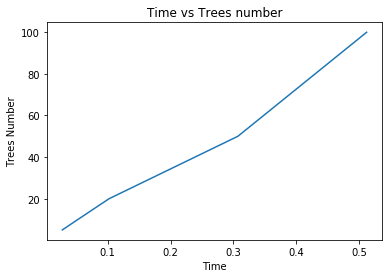

In [37]:
import time
import matplotlib.pyplot as plt

features = 20
timesTrain = []
trees = np.array([5,10,20,50,100])
for i in range (np.size(trees)):
    perf, std, timeTrain = RF(trees[i], features)
    timesTrain.append(timeTrain)
    
plt.plot(timesTrain, trees)
plt.xlabel('Time')
plt.ylabel('Trees Number')
plt.title('Time vs Trees number')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: time.clock has been dep

Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.9610693957645904+-0.007074499069205539


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: time.clock has been dep

Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.9486528658642532+-0.014772041769618965


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: time.clock has been dep

Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.9513611470244373+-0.02222907462205584


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: time.clock has been dep

Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.9291913540071861+-0.02564760207180468


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: time.clock has been dep

Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.9264291803093025+-0.025221692665524972


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: time.clock has been dep

Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.9250244258277+-0.03643675036227138


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


Text(0.5, 1.0, 'Time vs Features number')

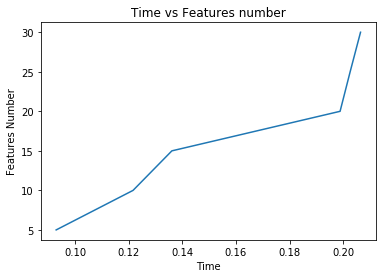

In [39]:
import time
import matplotlib.pyplot as plt

trees = 30
timesTrain = []
features = np.array([5,10,15,20,25,30])
for i in range (np.size(features)):
    perf, std, timeTrain = RF(trees, features[i])
    timesTrain.append(timeTrain)
    
plt.plot(timesTrain, features)
plt.xlabel('Time')
plt.ylabel('Features Number')
plt.title('Time vs Features number')